This is project trying to use a retail dataset to provide a future profit/loss that the store will make using linear regression model and later use random forest regressor for
comparison 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

The first part is data cleaning and understanding,here we handle missing values,correct invalid data, convert data column to datetime format and also remove duplicate.

In [ ]:


# Load the dataset
File_Path = "retail_sales_dataset.csv"  # Make sure this points to the correct file
retail_data = pd.read_csv(File_Path)

# Print first few rows to verify it's loaded correctly
#print(retail_data.head())

# Check for missing or null values
print("\nMissing Values in the Dataset:")
print(retail_data.isnull().sum())

# Check for invalid data (e.g., negative amounts)
print("\nChecking for invalid data:")
invalid_data = retail_data[(retail_data['Quantity'] < 0) | (retail_data['Price per Unit'] < 0) | (retail_data['Total Amount'] < 0)]
print(invalid_data)

# Convert the Date column to a datetime format
print("\nConverting 'Date' column to datetime format.")
retail_data['Date'] = pd.to_datetime(retail_data['Date'], errors='coerce')

# Remove duplicate rows
print("\nRemoving duplicate rows.")
retail_data = retail_data.drop_duplicates()

# Sort data by Date
print("\nSorting data by 'Date'.")
retail_data = retail_data.sort_values(by='Date')

# Display cleaned dataset overview
print("\nCleaned Dataset Overview:")
print(retail_data.info())

# Show first few rows of the cleaned dataset
print("\nFirst few rows of the cleaned dataset:")
#print(retail_data.head())


In phase 2 of the project,we are doing Explaratory Data analysis, that is sales analysis, customer insights and prodcut performance.

Sales Analysis:

Analyze total monthly sales trends.
Visualize revenue patterns for different product categories.

Customer Insights:
Explore customer demographics (age, gender) and spending trends.
Identify high-value customers.

Product Performance:
Rank product categories by revenue contribution.
Identify products with declining sales.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract Month-Year
retail_data['Month'] = retail_data['Date'].dt.to_period('M')
monthly_sales = retail_data.groupby('Month')['Total Amount'].sum().reset_index()

# Convert Month to String
monthly_sales['Month'] = monthly_sales['Month'].astype(str)

# 2. Visualize Revenue Patterns for Different Product Categories
category_revenue = retail_data.groupby('Product Category')['Total Amount'].sum().reset_index()

# Plot Total Monthly Sales Trends
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Total Amount', marker='o')
plt.title('Total Monthly Sales Trends', fontsize=16)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Total Revenue ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [ ]:
# 1. Spending Trends by Age and Gender
age_gender_spending = retail_data.groupby(['Age', 'Gender'])['Total Amount'].sum().reset_index()

# Plot Spending Trends by Age
plt.figure(figsize=(10, 6))
sns.scatterplot(data=age_gender_spending, x='Age', y='Total Amount', hue='Gender', palette='coolwarm')
plt.title('Spending Trends by Age and Gender', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Total Spending ($)', fontsize=12)
plt.legend(title='Gender')
plt.grid(True)
plt.show()

# 2. Identify High-Value Customers
top_customers = retail_data.groupby('Customer ID')['Total Amount'].sum().sort_values(ascending=False).head(10)

# Display High-Value Customers
print("Top 10 High-Value Customers:")
print(top_customers)


Product Categories Ranked by Revenue Contribution:
  Product Category  Total Amount
2      Electronics        156905
1         Clothing        155580
0           Beauty        143515


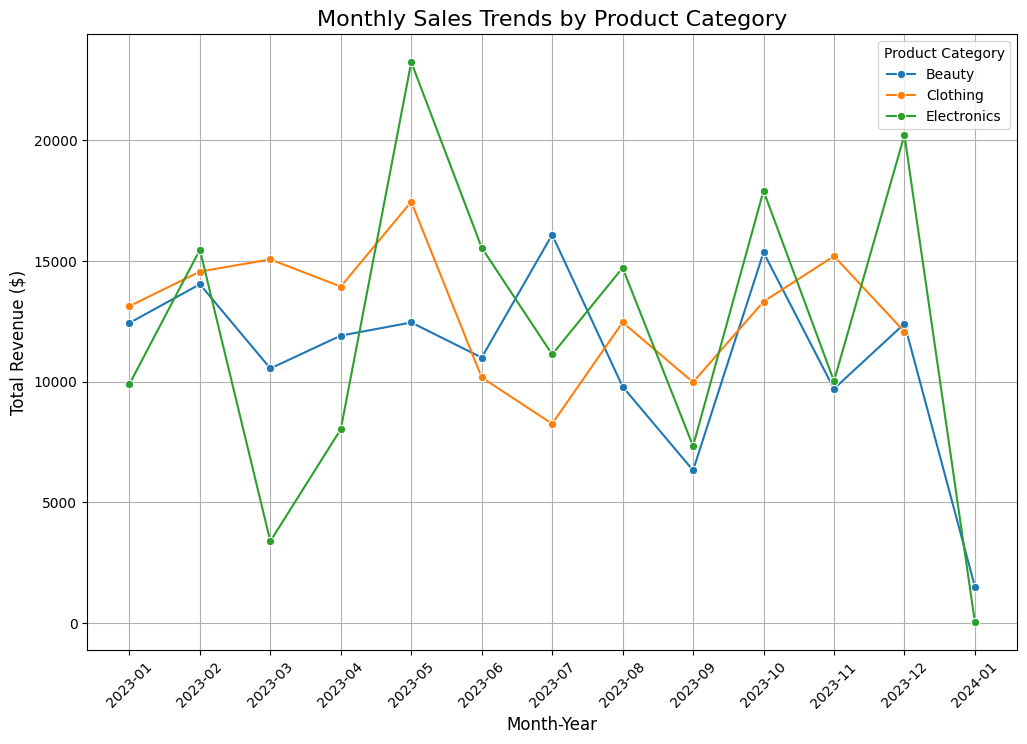

In [18]:
# 1. Rank Product Categories by Revenue Contribution
category_rank = category_revenue.sort_values(by='Total Amount', ascending=False)
print("Product Categories Ranked by Revenue Contribution:")
print(category_rank)

# 2. Identify Products with Declining Sales
# Ensure Month column is a string
monthly_category_sales['Month'] = monthly_category_sales['Month'].astype(str)

# Ensure Total Amount is numeric
monthly_category_sales['Total Amount'] = pd.to_numeric(monthly_category_sales['Total Amount'], errors='coerce')
monthly_category_sales.dropna(subset=['Total Amount'], inplace=True)

# Plot Monthly Sales Trends by Product Category
plt.figure(figsize=(12, 8))
sns.lineplot(data=monthly_category_sales, x='Month', y='Total Amount', hue='Product Category', marker='o')
plt.title('Monthly Sales Trends by Product Category', fontsize=16)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Total Revenue ($)', fontsize=12)
plt.legend(title='Product Category')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
